# Basic classification tutorial
This notebook is largely similar to the regression notebook, but applied to a classification problem.

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd

In [2]:
df = pd.read_csv('data/benthic_classification_tutorial.csv')
print(f'Number of rows: {len(df)}')
df.head()

Number of rows: 1871


,rhos_443,rhos_492,rhos_560,rhos_665,rhos_704,rhos_740,rhos_783,rhos_833,rhos_865,rhos_1614,rhos_2202,geometry,lev1_name,lev2_name,lev3_name
0,0.029425,0.016671,0.037489,0.019926,0.061639,0.133705,0.137357,0.179137,0.148176,0.045281,0.020206,POINT (327414.9906258732 6919174.920900912),ALGAE,BROWN,ASCNO
1,0.029425,0.018981,0.037740,0.017517,0.061639,0.133705,0.137357,0.184505,0.148176,0.045281,0.020206,POINT (327415.004078344 6919165.128987924),ALGAE,BROWN,ASCNO
2,0.029425,0.013973,0.023662,0.013271,0.040167,0.068293,0.078405,0.096658,0.075805,0.034354,0.022261,POINT (327414.9956098094 6919154.912502005),ALGAE,BROWN,ASCNO
3,0.029427,0.024624,0.033848,0.008219,0.013370,0.020778,0.023462,0.015439,0.030176,0.027602,0.019406,POINT (327415.0006078405 6919134.9041033),SEDIMENT,SAND,SAND
4,0.029427,0.022061,0.029450,0.009942,0.013370,0.020778,0.023462,0.015553,0.030176,0.027602,0.019406,POINT (327415.0140742379 6919125.112190507),ALGAE,BROWN,NaN


In [3]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

print(f'Number of rows in training set: {len(df_train)}')
print(f'Number of rows in test set: {len(df_test)}')

Number of rows in training set: 1496
Number of rows in test set: 375


In [4]:
features = ['rhos_443', 'rhos_492', 'rhos_560', 'rhos_665', 'rhos_704', 'rhos_740', 'rhos_783', 'rhos_833', 'rhos_865']
target = 'lev1_name'

X_train = df_train[features]
y_train = df_train[target]

X_test = df_test[features]
y_test = df_test[target]

Here, we use logistic regression, which is a linear classification model

In [5]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Different metrics are used in classification problems compared to regression problems. An example is accuracy, which is intuitive, but can be misleading when you have an imbalanced dataset.

In [6]:
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.568


Often, metrics such as precision, recall and F-score are used in these cases. Sklearn's method `classification_report` provides a handy tool to do this.

In [7]:
clf_report = classification_report(y_test, y_pred, zero_division=0)
print(clf_report)

              precision    recall  f1-score   support

       ALGAE       0.55      0.99      0.71       192
       ANGIO       0.00      0.00      0.00        27
      ANTHRO       0.00      0.00      0.00         1
   BEACHCAST       0.00      0.00      0.00         3
       GRASS       0.90      0.95      0.92        19
        ROCK       0.67      0.05      0.10        73
    SEDIMENT       0.00      0.00      0.00        60

    accuracy                           0.57       375
   macro avg       0.30      0.29      0.25       375
weighted avg       0.46      0.57      0.43       375



A typical way to visualize the results of a classification problem is a confusion matrix, which helps give insights in which classes the model struggles with.

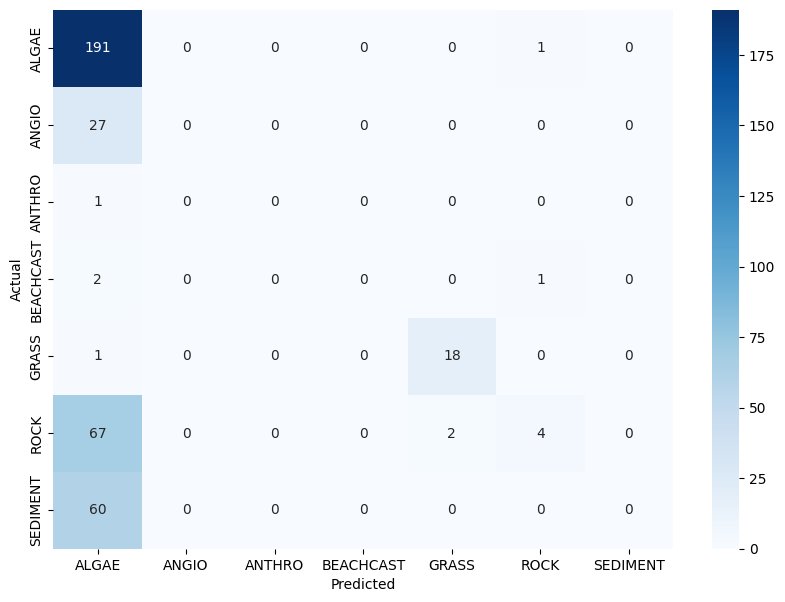

In [8]:
# Plot confusion matric
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

label_names_sorted = sorted(df_test[target].unique())

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))

ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names_sorted, yticklabels=label_names_sorted)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()